In [1]:
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
from matplotlib.pyplot import figure

In [2]:
os.chdir("/Users/pbenson/Documents/Min_Max_project/")
base_dict = pickle.load(open('Data/full_base_dict.pickle', 'rb'))
active_bases = list(base_dict.keys())

In [198]:
txn_converter = {'TXN - Item ID': str, 
                 'TXN - Transaction Type': str,
                 'TXN - Item ID': str,
                 'TXN - Qty': float,
                 'TXN - Total Cost': float}

central_quarters_df = pd.read_csv('Data/central_store_quarters_df.csv', index_col = 0, converters=txn_converter)
central_parts_df = pd.read_csv('Data/central_store_parts_df.csv', index_col=0, converters=txn_converter)

In [194]:
txn_df = pd.read_csv('Data/full_transaction_df.csv', converters=txn_converter)

/Users/pbenson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,7,18,19,20,21,28,34,37,41,45,48,49,51,55,57,58,59,60,67,68,70,71,72,74,76,78,79,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [199]:
central_out_df = txn_df.loc[txn_df['TXN - Transaction Type'] == '030']
central_out_df

,Unnamed: 0,TXN - Sequence Nbr,TXN - Transaction Type,TXN - Unit,TXN - Destination Unit,TXN - Transaction Date,TXN - Time Stamp,TXN - Order No,TXN - Item ID,TXN - Item Description,...,TXN - Recpt Type,TXN - Cost Element,TXN - Last Adj,TXN - Last Order,TXN - Last Date,TXN - Last Ptwy,TXN - Qty Avail,TXN - Qty Reserved,TXN - Qty Owned,TXN - Qty On Hand
540,540,166352400000035,030,BS012,NaN,2009/10/01,2009/10/01 12:20:21,MSR0683367,04294288,"WATER PUMP, CAT C9 ENGINE",...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,541,166334200000012,030,BS012,NaN,2009/10/01,2009/10/01 11:20:21,MSR0683289,04094002,HEAD GASKET,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,542,166334200000013,030,BS012,NaN,2009/10/01,2009/10/01 11:20:21,MSR0683291,04094003,O RING- CAT,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,543,166334200000014,030,BS012,NaN,2009/10/01,2009/10/01 11:20:21,MSR0683292,04294366,EXHAUST GASKET,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,544,166334200000015,030,BS012,NaN,2009/10/01,2009/10/01 11:20:21,MSR0683293,04094004,CYLINDER HEAD BOLTS 26 PER HE,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7265971,7265971,131083400000046,030,BS024,NaN,2020/06/30,2020/06/30 12:21:03,MSR2528987,02596001,"PADDLE, THIRD RAIL COLLECTOR S",...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7265972,7265972,130930000000005,030,BS023,NaN,2020/06/30,2020/06/30 00:50:48,MSR2528833,02591676,"CONNECTOR-QUICK DISC ONNECT,3/",...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7265973,7265973,130936200000001,030,BS010,NaN,2020/06/30,2020/06/30 01:20:36,MSR2528846,02690379,"STATIC STRAP,RUBBER - 31"" IN L",...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7265974,7265974,130948400000002,030,BS018,NaN,2020/06/30,2020/06/30 02:20:54,MSR2528857,04295441,"SPACER, MOUNTING, EXHAUST MANI",...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
transactions_per_part = central_out_df.groupby('TXN - Item ID').size()
transactions_per_part

TXN - Item ID
00118004            3
00118006            1
00118007            1
00118009            1
00118013            3
                   ..
RA2005261-054       1
RCMH-56-0           1
VBN2RV40A60PNT39    1
X050032100          1
YAV240M10           1
Length: 32797, dtype: int64

In [210]:
base_part_df_with_central = pd.read_csv('Data/base_part_df_with_central.csv', index_col = 0, converters=txn_converter)

In [211]:
base_part_df_with_central

,TXN - Item ID,usage_mean_base,usage_std_base,leadtime_mean,leadtime_std,Base,base_min,base_roq,usage_mean_central,usage_std_central,part_minimum,part_roq
0,00250113,1097.0,0.000000,0.466536,0.442777,BS018,135.857052,224.895984,675.571429,741.021661,1006.605394,1666.321387
1,00250113,115.0,101.000000,0.466536,0.442777,BS011,14.242079,23.576152,675.571429,741.021661,1006.605394,1666.321387
2,00250113,1102.0,0.000000,0.466536,0.442777,BS015,136.476273,225.921034,675.571429,741.021661,1006.605394,1666.321387
3,00250113,1100.0,0.000000,0.466536,0.442777,BS019,136.228584,225.511014,675.571429,741.021661,1006.605394,1666.321387
4,00250113,100.0,0.000000,0.466536,0.442777,BS017,12.384417,20.501001,675.571429,741.021661,1006.605394,1666.321387
...,...,...,...,...,...,...,...,...,...,...,...,...
19600,04854024,4.0,0.000000,0.184932,0.185691,BS009,0.369863,4.369863,4.000000,0.000000,0.739726,8.739726
19601,02591665,18.0,1.000000,0.358904,0.042708,BS029,3.589041,21.230137,18.000000,1.000000,7.178082,42.460274
19602,02693007,4.0,1.414214,0.182243,0.188217,BS029,0.622215,4.364485,4.000000,1.414214,1.244430,8.728970
19603,03476181,10.0,6.000000,0.402740,0.081042,BS029,4.430137,12.013699,10.000000,6.000000,8.860274,24.027397


In [212]:
central_parts_df

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std
0,00176001,15.750000,14.024532,0.081096,0.184266
1,00207001,18.583333,14.935742,0.275106,0.382035
2,00250113,675.571429,741.021661,0.466536,0.442777
3,00250125,852.666667,614.123404,0.190286,0.124712
4,00250126,1074.444444,494.219050,0.572747,0.632629
...,...,...,...,...,...
5052,45050130,7.750000,3.832427,1.039942,0.423137
5053,45050134,5.833333,4.336537,0.666438,0.180082
5054,45050135,7.833333,6.094168,0.506102,0.253235
5055,598742,5.375000,3.998046,NaN,NaN


In [213]:
print(central_parts_df.loc[central_parts_df['TXN - Item ID'] == '00176001'])
print(base_part_df_with_central.loc[base_part_df_with_central['TXN - Item ID'] == '00176001'])

  TXN - Item ID  usage_mean  usage_std  leadtime_mean  leadtime_std
0      00176001       15.75  14.024532       0.081096      0.184266
      TXN - Item ID  usage_mean_base  usage_std_base  leadtime_mean  \
13485      00176001         2.500000        0.500000       0.081096   
13486      00176001         2.666667        1.699673       0.081096   
13487      00176001        16.400000       14.718696       0.081096   
13488      00176001         9.714286        3.194383       0.081096   
13489      00176001         5.250000        4.145781       0.081096   
13490      00176001         4.000000        0.000000       0.081096   
13491      00176001         1.000000        0.000000       0.081096   

       leadtime_std   Base  base_min  base_roq  usage_mean_central  \
13485      0.184266  BS010  0.106906  0.986531               15.75   
13486      0.184266  BS023  0.114033  1.052300               15.75   
13487      0.184266  BS024  0.701303  6.471644               15.75   
13488      0.18

In [214]:
fmis_parts = pd.read_csv('Data/KJ_INV_BY_BASE.csv', encoding='unicode_escape')

In [215]:
# Filter fmis_parts to only active parts, drop last Ann, Util Type, Descr, Descr.1, Descr.2, $LTM demand.
fmis_parts.drop(columns=['Last Ann', 'Util Type', '$ LTM Demand', 'Descr', 'Descr.1', 'Descr.2'], inplace=True)

fmis_parts_filtered = fmis_parts.loc[fmis_parts['Status Current'] == 'Active']
fmis_parts_filtered.drop(columns = 'Status Current', inplace=True)

/Users/pbenson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [216]:
fmis_parts_filtered

,Unit,Item,Qty On Hand,On Hand Value,Reorder Pt,Reord Qty,Max Qty
0,BS009,00245008,50.0,139.05,5.0,5.0,10.0
1,BS009,00250052,150.0,21.00,0.0,0.0,0.0
2,BS009,00250053,110.0,15.40,0.0,0.0,0.0
3,BS009,00250056,100.0,13.44,0.0,0.0,0.0
4,BS009,00250113,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
178302,CS004,6444089,0.0,0.00,0.0,1.0,0.0
178304,CS004,679859,0.0,0.00,0.0,1.0,0.0
178305,CS004,81018058,0.0,0.00,0.0,0.0,0.0
178306,CS004,D30109-01,0.0,0.00,0.0,0.0,0.0


In [217]:
fmis_parts_filtered.rename(columns={'Unit':'Base', 'Item':'TXN - Item ID', 'Reorder Pt':'fmis_min', 'Reord Qty':'fmis_roq'}, inplace=True)

/Users/pbenson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [218]:
full_base_part_df_with_fmis = base_part_df_with_central.merge(fmis_parts_filtered, on=['TXN - Item ID', 'Base'], how='left')

full_base_part_df_with_fmis['base_min'] = round(full_base_part_df_with_fmis['base_min'])
full_base_part_df_with_fmis['base_roq'] = round(full_base_part_df_with_fmis['base_roq'])
full_base_part_df_with_fmis['part_minimum'] = round(full_base_part_df_with_fmis['part_minimum'])
full_base_part_df_with_fmis['part_roq'] = round(full_base_part_df_with_fmis['part_roq'])

In [219]:
mask = full_base_part_df_with_fmis['Base'] == 'CS004'
full_base_part_df_with_fmis.loc[mask, 'base_min'] = full_base_part_df_with_fmis['part_minimum']
full_base_part_df_with_fmis.loc[mask, 'base_roq'] = full_base_part_df_with_fmis['part_roq']

In [220]:
full_base_part_df_with_fmis

,TXN - Item ID,usage_mean_base,usage_std_base,leadtime_mean,leadtime_std,Base,base_min,base_roq,usage_mean_central,usage_std_central,part_minimum,part_roq,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty
0,00250113,1097.0,0.000000,0.466536,0.442777,BS018,136.0,225.0,675.571429,741.021661,1007.0,1666.0,0.0,0.0000,0.0,300.0,0.0
1,00250113,115.0,101.000000,0.466536,0.442777,BS011,14.0,24.0,675.571429,741.021661,1007.0,1666.0,300.0,33.6900,3.0,3.0,6.0
2,00250113,1102.0,0.000000,0.466536,0.442777,BS015,136.0,226.0,675.571429,741.021661,1007.0,1666.0,100.0,9.7800,50.0,50.0,100.0
3,00250113,1100.0,0.000000,0.466536,0.442777,BS019,136.0,226.0,675.571429,741.021661,1007.0,1666.0,0.0,0.0000,0.0,0.0,0.0
4,00250113,100.0,0.000000,0.466536,0.442777,BS017,12.0,21.0,675.571429,741.021661,1007.0,1666.0,200.0,22.3000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19600,04854024,4.0,0.000000,0.184932,0.185691,BS009,0.0,4.0,4.000000,0.000000,1.0,9.0,2.0,1.0000,1.0,1.0,2.0
19601,02591665,18.0,1.000000,0.358904,0.042708,BS029,4.0,21.0,18.000000,1.000000,7.0,42.0,53.0,159.0000,5.0,5.0,10.0
19602,02693007,4.0,1.414214,0.182243,0.188217,BS029,1.0,4.0,4.000000,1.414214,1.0,9.0,34.0,710.6000,5.0,5.0,10.0
19603,03476181,10.0,6.000000,0.402740,0.081042,BS029,4.0,12.0,10.000000,6.000000,9.0,24.0,14.0,99.3006,10.0,10.0,20.0


In [221]:
full_base_part_df_with_fmis['difference_min'] = full_base_part_df_with_fmis['fmis_min'] - full_base_part_df_with_fmis['base_min']
full_base_part_df_with_fmis['difference_roq'] = full_base_part_df_with_fmis['fmis_roq'] - full_base_part_df_with_fmis['base_roq']

In [222]:
# Negative numbers: how much less the 

In [223]:
full_base_part_df_with_fmis.loc[full_base_part_df_with_fmis['Base'] == 'CS004']

,TXN - Item ID,usage_mean_base,usage_std_base,leadtime_mean,leadtime_std,Base,base_min,base_roq,usage_mean_central,usage_std_central,part_minimum,part_roq,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,difference_min,difference_roq
6,00250113,100.000000,0.000000,0.466536,0.442777,CS004,1007.0,1666.0,675.571429,741.021661,1007.0,1666.0,500.0,56.4000,500.0,500.0,1000.0,-507.0,-1166.0
10,00250134,3500.000000,3193.743885,0.211103,0.179962,CS004,2100.0,8499.0,3844.000000,3050.780884,2100.0,8499.0,7260.0,4855.4880,500.0,500.0,1500.0,-1600.0,-7999.0
16,02008050,1000.000000,500.000000,0.107060,0.057292,CS004,155.0,819.0,388.666667,530.525107,155.0,819.0,1602.0,192.2400,156.0,350.0,506.0,1.0,-469.0
30,02013026,4.000000,0.000000,0.136621,0.107029,CS004,20.0,124.0,58.083333,43.698700,20.0,124.0,0.0,0.0000,50.0,50.0,200.0,30.0,-74.0
39,02013028,16.000000,0.000000,0.161395,0.125308,CS004,4.0,28.0,13.000000,6.016644,4.0,28.0,160.0,24.0000,20.0,20.0,40.0,16.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19418,32201003,87.333333,38.417299,0.876941,1.103207,CS004,144.0,251.0,87.333333,38.417299,144.0,251.0,183.0,24336.6759,75.0,75.0,150.0,-69.0,-176.0
19419,42008001,1300.000000,300.000000,0.098630,0.053687,CS004,187.0,2728.0,1300.000000,300.000000,187.0,2728.0,1600.0,85.4400,500.0,500.0,1000.0,313.0,-2228.0
19420,42531005,15.500000,8.645808,0.710137,0.597814,CS004,23.0,42.0,15.500000,8.645808,23.0,42.0,18.0,1166.7600,20.0,20.0,50.0,-3.0,-22.0
19421,42609004,15.428571,6.904598,0.174698,0.122234,CS004,5.0,32.0,14.545455,7.139692,5.0,32.0,35.0,3210.1685,16.0,16.0,34.0,11.0,-16.0


(array([ 210.,  253.,  379.,  613., 1707., 4515., 3105., 1669.,  704.,
        1143.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

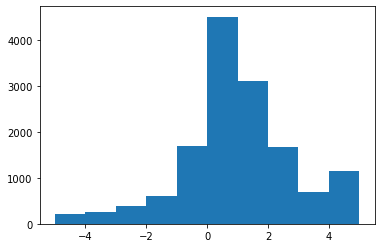

In [224]:
plt.hist(full_base_part_df_with_fmis['difference_min'], range=[-5,5])

(array([ 356.,  469.,  722., 1248., 3579., 5180., 1319.,  688.,  378.,
         449.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <BarContainer object of 10 artists>)

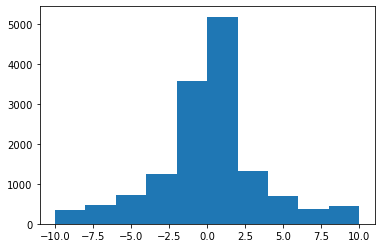

In [225]:
plt.hist(full_base_part_df_with_fmis['difference_roq'], range=[-10,10])

The differences are still left-skewed. This makes sense though – if part numbers are fairly low, the difference between FMIS and our data will be fairly low. Try scaling by base usage?

In [226]:
full_base_part_df_with_fmis['difference_min'].sum()

-43439.0

In [227]:
full_base_part_df_with_fmis['scaled_diff_min'] = full_base_part_df_with_fmis['difference_min'] / full_base_part_df_with_fmis['usage_mean_base']
full_base_part_df_with_fmis['scaled_diff_roq'] = full_base_part_df_with_fmis['difference_roq'] / full_base_part_df_with_fmis['usage_mean_base']

In [228]:
need_more = full_base_part_df_with_fmis.sort_values(by='scaled_diff_min', ascending=True)[0:100]
need_less = full_base_part_df_with_fmis.sort_values(by='scaled_diff_min', ascending=False)[0:100]

Also, using base-specific stuff for CS004 is wrong. Reset this up a few cells. 

Problem in calculations: If we use proportion of base usage, bases with very little usage could end up with exorbitant min/maxes. 

(array([9149., 2232., 1213.,  295.,  396.,  134.,  163.,   43.,   88.,
          68.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

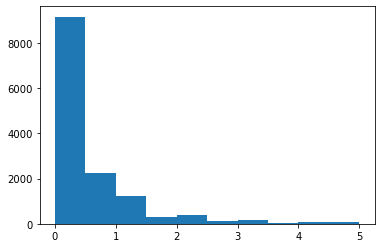

In [229]:
plt.hist(full_base_part_df_with_fmis['scaled_diff_min'], range=[0,5])

For most parts, the difference is a small fraction of the part's usage mean. 

In [230]:
full_base_part_df_with_fmis.loc[full_base_part_df_with_fmis['scaled_diff_min'] <= 1]

,TXN - Item ID,usage_mean_base,usage_std_base,leadtime_mean,leadtime_std,Base,base_min,base_roq,usage_mean_central,usage_std_central,...,part_roq,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,difference_min,difference_roq,scaled_diff_min,scaled_diff_roq
0,00250113,1097.0,0.000000,0.466536,0.442777,BS018,136.0,225.0,675.571429,741.021661,...,1666.0,0.0,0.0000,0.0,300.0,0.0,-136.0,75.0,-0.123974,0.068368
1,00250113,115.0,101.000000,0.466536,0.442777,BS011,14.0,24.0,675.571429,741.021661,...,1666.0,300.0,33.6900,3.0,3.0,6.0,-11.0,-21.0,-0.095652,-0.182609
2,00250113,1102.0,0.000000,0.466536,0.442777,BS015,136.0,226.0,675.571429,741.021661,...,1666.0,100.0,9.7800,50.0,50.0,100.0,-86.0,-176.0,-0.078040,-0.159710
3,00250113,1100.0,0.000000,0.466536,0.442777,BS019,136.0,226.0,675.571429,741.021661,...,1666.0,0.0,0.0000,0.0,0.0,0.0,-136.0,-226.0,-0.123636,-0.205455
4,00250113,100.0,0.000000,0.466536,0.442777,BS017,12.0,21.0,675.571429,741.021661,...,1666.0,200.0,22.3000,0.0,0.0,1.0,-12.0,-21.0,-0.120000,-0.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19600,04854024,4.0,0.000000,0.184932,0.185691,BS009,0.0,4.0,4.000000,0.000000,...,9.0,2.0,1.0000,1.0,1.0,2.0,1.0,-3.0,0.250000,-0.750000
19601,02591665,18.0,1.000000,0.358904,0.042708,BS029,4.0,21.0,18.000000,1.000000,...,42.0,53.0,159.0000,5.0,5.0,10.0,1.0,-16.0,0.055556,-0.888889
19602,02693007,4.0,1.414214,0.182243,0.188217,BS029,1.0,4.0,4.000000,1.414214,...,9.0,34.0,710.6000,5.0,5.0,10.0,4.0,1.0,1.000000,0.250000
19603,03476181,10.0,6.000000,0.402740,0.081042,BS029,4.0,12.0,10.000000,6.000000,...,24.0,14.0,99.3006,10.0,10.0,20.0,6.0,-2.0,0.600000,-0.200000


# Using only data from Central (not as a base)
This analysis is only using the 031 out code. 

In [231]:
central_parts_df

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std
0,00176001,15.750000,14.024532,0.081096,0.184266
1,00207001,18.583333,14.935742,0.275106,0.382035
2,00250113,675.571429,741.021661,0.466536,0.442777
3,00250125,852.666667,614.123404,0.190286,0.124712
4,00250126,1074.444444,494.219050,0.572747,0.632629
...,...,...,...,...,...
5052,45050130,7.750000,3.832427,1.039942,0.423137
5053,45050134,5.833333,4.336537,0.666438,0.180082
5054,45050135,7.833333,6.094168,0.506102,0.253235
5055,598742,5.375000,3.998046,NaN,NaN


In [232]:
def calc_min_roq(part_df, safety = 1, quarters_per_purchase = 2):
    copied_df = part_df.copy(deep=True)

    copied_df['part_minimum'] = copied_df['leadtime_mean'] * (copied_df['usage_mean'] + (safety * copied_df['usage_std']))
    copied_df['part_roq'] = (copied_df['leadtime_mean'] * copied_df['usage_mean']) + (quarters_per_purchase * copied_df['usage_mean'])
    
    return copied_df

In [233]:
central_with_mins = calc_min_roq(central_parts_df, safety=1)
central_with_mins['part_minimum'] = round(central_with_mins['part_minimum'])
central_with_mins['part_roq'] = round(central_with_mins['part_roq'])

In [234]:
central_with_mins

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq
0,00176001,15.750000,14.024532,0.081096,0.184266,2.0,33.0
1,00207001,18.583333,14.935742,0.275106,0.382035,9.0,42.0
2,00250113,675.571429,741.021661,0.466536,0.442777,661.0,1666.0
3,00250125,852.666667,614.123404,0.190286,0.124712,279.0,1868.0
4,00250126,1074.444444,494.219050,0.572747,0.632629,898.0,2764.0
...,...,...,...,...,...,...,...
5052,45050130,7.750000,3.832427,1.039942,0.423137,12.0,24.0
5053,45050134,5.833333,4.336537,0.666438,0.180082,7.0,16.0
5054,45050135,7.833333,6.094168,0.506102,0.253235,7.0,20.0
5055,598742,5.375000,3.998046,NaN,NaN,NaN,NaN


In [235]:
fmis_parts_central = fmis_parts_filtered.loc[fmis_parts_filtered['Base'] == 'CS004']

In [236]:
central_with_fmis = central_with_mins.merge(fmis_parts_central, on='TXN - Item ID', how='left')
central_with_fmis

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty
0,00176001,15.750000,14.024532,0.081096,0.184266,2.0,33.0,CS004,14.0,240.4402,10.0,10.0,20.0
1,00207001,18.583333,14.935742,0.275106,0.382035,9.0,42.0,CS004,58.0,856.0800,12.0,17.0,29.0
2,00250113,675.571429,741.021661,0.466536,0.442777,661.0,1666.0,CS004,500.0,56.4000,500.0,500.0,1000.0
3,00250125,852.666667,614.123404,0.190286,0.124712,279.0,1868.0,CS004,1000.0,8388.0000,0.0,367.0,1000.0
4,00250126,1074.444444,494.219050,0.572747,0.632629,898.0,2764.0,CS004,2000.0,8500.0000,500.0,500.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,45050130,7.750000,3.832427,1.039942,0.423137,12.0,24.0,CS004,65.0,8593.1170,40.0,40.0,80.0
5053,45050134,5.833333,4.336537,0.666438,0.180082,7.0,16.0,CS004,20.0,278.6480,12.0,10.0,22.0
5054,45050135,7.833333,6.094168,0.506102,0.253235,7.0,20.0,CS004,70.0,455.0000,8.0,8.0,16.0
5055,598742,5.375000,3.998046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
central_with_fmis['min_diff'] = central_with_fmis['fmis_min'] - central_with_fmis['part_minimum']
central_with_fmis['roq_diff'] = central_with_fmis['fmis_roq'] - central_with_fmis['part_roq']

(array([ 77., 112., 169., 254., 498., 568., 483., 355., 207., 282.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <BarContainer object of 10 artists>)

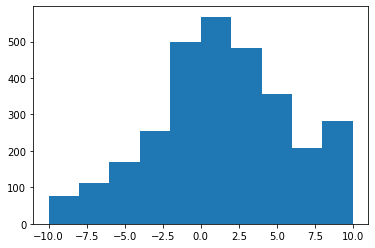

In [238]:
plt.hist(central_with_fmis['min_diff'], range=[-10, 10])

In [239]:
central_with_fmis.sort_values(by='min_diff')[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff
718,02440210,32369.083333,10370.265196,1.180987,1.045059,50475.0,102966.0,CS004,51800.0,16591.5400,25000.0,50000.0,75000.0,-25475.0,-52966.0
558,02409106,16198.333333,5490.346928,0.652871,0.680555,14160.0,42972.0,CS004,18550.0,10464.0550,5000.0,20000.0,20000.0,-9160.0,-22972.0
695,02432251,11351.416667,2385.420314,1.333408,1.184890,18317.0,37839.0,CS004,0.0,0.0000,10000.0,15000.0,25000.0,-8317.0,-22839.0
4665,31402010,12897.833333,3419.039847,0.942224,0.605317,15374.0,37948.0,CS004,12288.0,2329.8048,10000.0,10000.0,20000.0,-5374.0,-27948.0
4667,31402019,12855.416667,3053.471971,0.870801,0.549127,13853.0,36905.0,CS004,15552.0,2951.7696,10000.0,10000.0,20000.0,-3853.0,-26905.0
4236,05180128,1398.083333,355.032970,1.527999,1.142251,2679.0,4932.0,CS004,0.0,0.0000,1000.0,2000.0,3000.0,-1679.0,-2932.0
1126,02580231,870.444444,359.148410,1.209437,0.808095,1487.0,2794.0,CS004,2002.0,15965.3494,0.0,0.0,0.0,-1487.0,-2794.0
4560,20526002,3350.000000,2025.462910,0.644384,1.037835,3464.0,8859.0,CS004,20000.0,1984.0000,2000.0,2000.0,4000.0,-1464.0,-6859.0
8,00250138,2766.666667,2498.443960,0.467365,0.555537,2461.0,6826.0,CS004,3500.0,2047.5000,1000.0,1000.0,2000.0,-1461.0,-5826.0
2210,03080132,2221.666667,858.382135,0.973799,0.812241,2999.0,6607.0,CS004,1250.0,11868.7500,1600.0,1600.0,4200.0,-1399.0,-5007.0


This is fascinating – many of FMIS mins/maxes seem almost arbitrary and "reaction-based". They seem designed to "get rid" of parts in storage and phase them out. 

- Do we have a list of parts we are trying to phase out?

In [240]:
central_with_fmis['quarters_on_hand'] = central_with_fmis['Qty On Hand'] / central_with_fmis['usage_mean']

In [241]:
central_with_fmis.sort_values(by='quarters_on_hand', ascending=False)[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
1199,02591101,5.500000,3.201562,NaN,NaN,NaN,NaN,CS004,3400.0,166.6000,0.0,0.0,0.0,NaN,NaN,618.181818
876,02545065,7.100000,6.139218,0.461735,0.555273,6.0,17.0,CS004,3133.0,575.2188,371.0,586.0,957.0,365.0,569.0,441.267606
1942,02696518,14.636364,18.321734,NaN,NaN,NaN,NaN,CS004,6168.0,11226.3768,5.0,5.0,10.0,NaN,NaN,421.416149
1219,02591540,2.857143,2.996597,0.447945,0.452857,3.0,7.0,CS004,650.0,324.8050,100.0,100.0,200.0,97.0,93.0,227.500000
967,02567125,4.833333,3.411582,0.299804,0.133231,2.0,11.0,CS004,810.0,429.2190,136.0,254.0,390.0,134.0,243.0,167.586207
4000,04595102,20.400000,15.094370,0.185519,0.229464,7.0,45.0,CS004,3011.0,1447.3877,50.0,100.0,100.0,43.0,55.0,147.598039
2503,03276550,2.600000,1.200000,0.312329,0.172320,1.0,6.0,CS004,365.0,813.9500,6.0,9.0,15.0,5.0,3.0,140.384615
2575,03401332,3.583333,2.059868,NaN,NaN,NaN,NaN,CS004,427.0,663.5580,0.0,1.0,1.0,NaN,NaN,119.162791
3834,04592105,2.666667,2.260777,0.321209,0.425471,2.0,6.0,CS004,317.0,5826.2381,20.0,20.0,40.0,18.0,14.0,118.875000
5017,43008084,8.444444,5.871042,0.281279,0.237134,4.0,19.0,CS004,995.0,1472.6000,48.0,55.0,103.0,44.0,36.0,117.828947


In [153]:
print(central_quarters_df.loc[central_quarters_df['TXN - Item ID'] == '45020001'])
print(central_quarters_df.loc[central_quarters_df['TXN - Item ID'] == '03280225'])

       TXN - Item ID  Quarters  TXN - Qty
162005      45020001         1       44.0
162006      45020001         2      160.0
162007      45020001         3      120.0
162008      45020001         4       30.0
162009      45020001         5      130.0
162010      45020001         6       66.0
162011      45020001         7      150.0
162012      45020001         8      260.0
162013      45020001         9      160.0
162014      45020001        10       78.0
162015      45020001        11       80.0
162016      45020001        12      100.0
162017      45020001        13      120.0
162018      45020001        14       30.0
162019      45020001        15       60.0
162020      45020001        16      140.0
162021      45020001        18      100.0
162022      45020001        20       75.0
162023      45020001        21      100.0
162024      45020001        23       70.0
162025      45020001        24      119.0
162026      45020001        25      100.0
162027      45020001        27    

It is tough to draw conclusions from looking at the broad swathes. This new model doesn't paint a coherent model of "reducing all min/maxes", but it tells interesting stories. 

In [242]:
central_with_fmis.loc[central_with_fmis['quarters_on_hand'] >= 4]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
10,00958001,46.090909,32.570077,2.197260,1.133479,173.0,193.0,CS004,222.0,207434.8908,160.0,160.0,320.0,-13.0,-33.0,4.816568
11,00976001,28.200000,23.638105,1.842192,0.789033,95.0,108.0,CS004,330.0,295394.6160,200.0,200.0,400.0,105.0,92.0,11.702128
13,01079001,21.833333,13.582055,0.690411,0.000000,24.0,59.0,CS004,416.0,15329.6000,300.0,1.0,500.0,276.0,-58.0,19.053435
16,02001001,17.857143,22.918667,0.272039,0.612411,11.0,41.0,CS004,108.0,893.9916,50.0,53.0,100.0,39.0,12.0,6.048000
24,02005028,87.777778,113.919833,0.132151,0.107076,27.0,187.0,CS004,500.0,50.8000,118.0,271.0,389.0,91.0,84.0,5.696203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,45020001,61.833333,143.293308,0.221171,0.281300,45.0,137.0,CS004,5620.0,38282.8780,10.0,10.0,20.0,-35.0,-127.0,90.889488
5048,45050010,6.625000,4.151430,1.161957,0.538346,13.0,21.0,CS004,52.0,6503.6452,10.0,5.0,15.0,-3.0,-16.0,7.849057
5049,45050037,76.545455,179.571391,1.186606,0.453083,304.0,244.0,CS004,355.0,3141.7500,35.0,35.0,60.0,-269.0,-209.0,4.637767
5052,45050130,7.750000,3.832427,1.039942,0.423137,12.0,24.0,CS004,65.0,8593.1170,40.0,40.0,80.0,28.0,16.0,8.387097


There are 1400 parts with at least a year of parts on hand! Some of these have literally decades of parts on hand. 

In [243]:
central_with_fmis.loc[central_with_fmis['quarters_on_hand'] <= 1]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
0,00176001,15.750000,14.024532,0.081096,0.184266,2.0,33.0,CS004,14.0,240.4402,10.0,10.0,20.0,8.0,-23.0,0.888889
2,00250113,675.571429,741.021661,0.466536,0.442777,661.0,1666.0,CS004,500.0,56.4000,500.0,500.0,1000.0,-161.0,-1166.0,0.740114
9,00901026,99.363636,54.931813,2.161192,0.832413,333.0,413.0,CS004,72.0,47449.2312,297.0,297.0,567.0,-36.0,-116.0,0.724611
17,02001146,258.333333,122.474487,0.513242,0.483225,195.0,649.0,CS004,47.0,308.9122,200.0,300.0,500.0,5.0,-349.0,0.181935
20,02005008,680.857143,369.526503,0.139836,0.120539,147.0,1457.0,CS004,250.0,65.0250,226.0,485.0,711.0,79.0,-972.0,0.367184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,43208008,120.818182,49.289162,0.928966,0.935394,158.0,354.0,CS004,0.0,0.0000,100.0,100.0,200.0,-58.0,-254.0,0.000000
5028,43209002,7.800000,11.267653,0.295890,0.000000,6.0,18.0,CS004,3.0,97.5900,6.0,6.0,24.0,0.0,-12.0,0.384615
5041,44908069,6.636364,6.019253,0.605479,0.093110,8.0,17.0,CS004,5.0,136.7500,5.0,15.0,20.0,-3.0,-2.0,0.753425
5045,44962002,47.833333,50.834426,0.576580,0.500242,57.0,123.0,CS004,0.0,0.0000,35.0,45.0,80.0,-22.0,-78.0,0.000000


There are 1000 parts with less than a quarter of parts on hand. This is a little worrying – it would take one quarterly usage to wipe out all of its stock. However, there are other parts of this at the base level. 

The goal here is to normalize our part counts so that most parts have about the same band of quarters on hand.

In [245]:
central_with_fmis.loc[central_with_fmis['fmis_min'] > central_with_fmis['Qty On Hand']]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
9,00901026,99.363636,54.931813,2.161192,0.832413,333.0,413.0,CS004,72.0,47449.2312,297.0,297.0,567.0,-36.0,-116.0,0.724611
17,02001146,258.333333,122.474487,0.513242,0.483225,195.0,649.0,CS004,47.0,308.9122,200.0,300.0,500.0,5.0,-349.0,0.181935
36,02013026,58.083333,43.698700,0.136621,0.107029,14.0,124.0,CS004,0.0,0.0000,50.0,50.0,200.0,36.0,-74.0,0.000000
134,02082078,441.181818,316.789525,0.239190,0.261833,181.0,988.0,CS004,795.0,43.7250,1033.0,2114.0,3147.0,852.0,1126.0,1.801978
142,02100111,40.333333,20.821997,0.288767,0.141928,18.0,92.0,CS004,9.0,213.7500,20.0,20.0,40.0,2.0,-72.0,0.223140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,43096038,24.800000,24.656845,0.746301,0.501493,37.0,68.0,CS004,0.0,0.0000,40.0,40.0,60.0,3.0,-28.0,0.000000
5026,43208008,120.818182,49.289162,0.928966,0.935394,158.0,354.0,CS004,0.0,0.0000,100.0,100.0,200.0,-58.0,-254.0,0.000000
5028,43209002,7.800000,11.267653,0.295890,0.000000,6.0,18.0,CS004,3.0,97.5900,6.0,6.0,24.0,0.0,-12.0,0.384615
5045,44962002,47.833333,50.834426,0.576580,0.500242,57.0,123.0,CS004,0.0,0.0000,35.0,45.0,80.0,-22.0,-78.0,0.000000


There are only 500 parts below their mins. 

In [246]:
central_with_fmis.loc[central_with_fmis['part_minimum'] > central_with_fmis['Qty On Hand']]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
2,00250113,675.571429,741.021661,0.466536,0.442777,661.0,1666.0,CS004,500.0,56.4000,500.0,500.0,1000.0,-161.0,-1166.0,0.740114
9,00901026,99.363636,54.931813,2.161192,0.832413,333.0,413.0,CS004,72.0,47449.2312,297.0,297.0,567.0,-36.0,-116.0,0.724611
17,02001146,258.333333,122.474487,0.513242,0.483225,195.0,649.0,CS004,47.0,308.9122,200.0,300.0,500.0,5.0,-349.0,0.181935
36,02013026,58.083333,43.698700,0.136621,0.107029,14.0,124.0,CS004,0.0,0.0000,50.0,50.0,200.0,36.0,-74.0,0.000000
52,02047088,101.250000,69.135284,0.313242,0.437155,53.0,234.0,CS004,45.0,15.4710,0.0,0.0,1.0,-53.0,-234.0,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,43209002,7.800000,11.267653,0.295890,0.000000,6.0,18.0,CS004,3.0,97.5900,6.0,6.0,24.0,0.0,-12.0,0.384615
5035,44908033,2.555556,1.065740,1.503805,0.469851,5.0,9.0,CS004,3.0,975.0000,0.0,1.0,1.0,-5.0,-8.0,1.173913
5041,44908069,6.636364,6.019253,0.605479,0.093110,8.0,17.0,CS004,5.0,136.7500,5.0,15.0,20.0,-3.0,-2.0,0.753425
5045,44962002,47.833333,50.834426,0.576580,0.500242,57.0,123.0,CS004,0.0,0.0000,35.0,45.0,80.0,-22.0,-78.0,0.000000


There are 686 parts below the recommended part min. 

In [247]:
central_with_fmis.loc[central_with_fmis['fmis_min'] <= central_with_fmis['part_minimum']]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
2,00250113,675.571429,741.021661,0.466536,0.442777,661.0,1666.0,CS004,500.0,56.4000,500.0,500.0,1000.0,-161.0,-1166.0,0.740114
3,00250125,852.666667,614.123404,0.190286,0.124712,279.0,1868.0,CS004,1000.0,8388.0000,0.0,367.0,1000.0,-279.0,-1501.0,1.172791
4,00250126,1074.444444,494.219050,0.572747,0.632629,898.0,2764.0,CS004,2000.0,8500.0000,500.0,500.0,1500.0,-398.0,-2264.0,1.861427
5,00250133,700.000000,562.731434,0.501802,0.716779,634.0,1751.0,CS004,1500.0,945.0000,500.0,1000.0,1500.0,-134.0,-751.0,2.142857
6,00250134,3844.000000,3050.780884,0.211103,0.179962,1456.0,8499.0,CS004,7260.0,4855.4880,500.0,500.0,1500.0,-956.0,-7999.0,1.888658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,45007001,2.125000,1.165922,1.109378,0.369169,4.0,7.0,CS004,0.0,0.0000,1.0,1.0,3.0,-3.0,-6.0,0.000000
5047,45020001,61.833333,143.293308,0.221171,0.281300,45.0,137.0,CS004,5620.0,38282.8780,10.0,10.0,20.0,-35.0,-127.0,90.889488
5048,45050010,6.625000,4.151430,1.161957,0.538346,13.0,21.0,CS004,52.0,6503.6452,10.0,5.0,15.0,-3.0,-16.0,7.849057
5049,45050037,76.545455,179.571391,1.186606,0.453083,304.0,244.0,CS004,355.0,3141.7500,35.0,35.0,60.0,-269.0,-209.0,4.637767


It is about a 60-40 split of parts that have a lower recommended min than FMIS and a higher recommended min than FMIS. 

In [248]:
central_with_fmis.sort_values(by='leadtime_mean', ascending=False)[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
2172,03058005,16.916667,10.250677,4.615160,1.865302,125.0,112.0,CS004,247.0,56054.8469,100.0,100.0,200.0,-25.0,-12.0,14.600985
2173,03058006,45.833333,23.547234,3.747945,2.166282,260.0,263.0,CS004,315.0,62141.3730,200.0,200.0,400.0,-60.0,-63.0,6.872727
999,02569323,2.000000,0.816497,3.726027,0.000000,10.0,11.0,CS004,12.0,229.4400,0.0,0.0,0.0,-10.0,-11.0,6.000000
2212,03083002,2.000000,1.154701,3.644932,2.721015,11.0,11.0,CS004,51.0,19522.8000,22.0,22.0,46.0,11.0,11.0,25.500000
4517,15600100,4.000000,0.632456,3.621918,3.161644,17.0,22.0,CS004,25.0,2500.0000,4.0,12.0,12.0,-13.0,-10.0,6.250000
3673,04558129,5.250000,1.299038,3.583562,0.407204,23.0,29.0,CS004,0.0,0.0000,5.0,5.0,10.0,-18.0,-24.0,0.000000
893,02558022,1.600000,0.489898,3.369863,2.295890,7.0,9.0,CS004,5.0,835.5000,0.0,1.0,1.0,-7.0,-8.0,3.125000
1106,02576095,2.200000,1.939072,3.211955,2.589341,13.0,11.0,CS004,0.0,0.0000,1.0,1.0,2.0,-12.0,-10.0,0.000000
2243,03207086,34.400000,25.931448,3.068959,1.364638,185.0,174.0,CS004,192.0,41664.0000,75.0,75.0,150.0,-110.0,-99.0,5.581395
796,02507430,16.250000,7.072541,3.054731,2.933816,71.0,82.0,CS004,45.0,378496.5480,40.0,80.0,80.0,-31.0,-2.0,2.769231


In [249]:
central_with_fmis.sort_values(by='On Hand Value', ascending=False)[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand
834,02508430,7.500000,2.661453,2.917808,1.559862,30.0,37.0,CS004,66.0,490396.9026,50.0,50.0,100.0,20.0,13.0,8.800000
5013,43008050,17.000000,11.497035,2.839041,0.647775,81.0,82.0,CS004,222.0,418446.0018,75.0,75.0,150.0,-6.0,-7.0,13.058824
796,02507430,16.250000,7.072541,3.054731,2.933816,71.0,82.0,CS004,45.0,378496.5480,40.0,80.0,80.0,-31.0,-2.0,2.769231
11,00976001,28.200000,23.638105,1.842192,0.789033,95.0,108.0,CS004,330.0,295394.6160,200.0,200.0,400.0,105.0,92.0,11.702128
2969,04282087,4.000000,2.323790,1.196712,1.350139,8.0,13.0,CS004,34.0,250260.8692,2.0,3.0,4.0,-6.0,-10.0,8.500000
10,00958001,46.090909,32.570077,2.197260,1.133479,173.0,193.0,CS004,222.0,207434.8908,160.0,160.0,320.0,-13.0,-33.0,4.816568
4289,05276001,72.333333,29.682580,0.058630,0.058635,6.0,149.0,CS004,148.0,192819.0324,80.0,80.0,110.0,74.0,-69.0,2.046083
2225,03207017,473.583333,110.097274,2.726182,1.691842,1591.0,2238.0,CS004,4422.0,120881.1186,500.0,500.0,1000.0,-1091.0,-1738.0,9.337322
2227,03207027,3.111111,2.514157,2.180213,0.975340,12.0,13.0,CS004,49.0,108450.9503,37.0,12.0,49.0,25.0,-1.0,15.750000
810,02508021,125.750000,62.439471,1.751528,0.828700,330.0,472.0,CS004,514.0,105612.8136,300.0,300.0,500.0,-30.0,-172.0,4.087475


In [340]:
central_with_fmis['leadtime_mean'].mean()

0.4361181691456855

In [250]:
central_with_fmis['Unit Price'] = central_with_fmis['On Hand Value'] / central_with_fmis['Qty On Hand']

In [251]:
central_with_fmis.sort_values(by='Unit Price', ascending=False).loc[central_with_fmis['Qty On Hand'] > 5][0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price
796,02507430,16.250000,7.072541,3.054731,2.933816,71.0,82.0,CS004,45.0,378496.5480,40.0,80.0,80.0,-31.0,-2.0,2.769231,8411.0344
3643,04533003,3.666667,2.687419,0.356164,0.099690,2.0,9.0,CS004,10.0,76412.2000,3.0,3.0,6.0,1.0,-6.0,2.727273,7641.2200
834,02508430,7.500000,2.661453,2.917808,1.559862,30.0,37.0,CS004,66.0,490396.9026,50.0,50.0,100.0,20.0,13.0,8.800000,7430.2561
2969,04282087,4.000000,2.323790,1.196712,1.350139,8.0,13.0,CS004,34.0,250260.8692,2.0,3.0,4.0,-6.0,-10.0,8.500000,7360.6138
2765,03508030,3.875000,2.570870,2.653678,1.557749,17.0,18.0,CS004,13.0,47970.0000,5.0,5.0,10.0,-12.0,-13.0,3.354839,3690.0000
3641,04532020,26.166667,23.540155,0.173516,0.055670,9.0,57.0,CS004,12.0,41280.0000,10.0,20.0,30.0,1.0,-37.0,0.458599,3440.0000
4602,30924113,11.833333,10.155732,0.194521,0.234707,4.0,26.0,CS004,19.0,64048.6751,12.0,12.0,22.0,8.0,-14.0,1.605634,3370.9829
4296,05281013,7.100000,4.928489,0.438356,0.424889,5.0,17.0,CS004,8.0,26489.5976,7.0,8.0,15.0,2.0,-9.0,1.126761,3311.1997
2855,03696063,1.333333,0.471405,0.572603,0.393330,1.0,3.0,CS004,8.0,25352.5200,3.0,5.0,8.0,2.0,2.0,6.000000,3169.0650
1735,02690194,7.083333,3.226410,0.527283,0.637336,5.0,18.0,CS004,11.0,33134.3056,5.0,10.0,20.0,0.0,-8.0,1.552941,3012.2096


In [252]:
central_with_fmis['leadtime_mean'].corr(central_with_fmis['On Hand Value'])

0.31350732737960146

In [253]:
central_with_fmis['leadtime_mean'].corr(central_with_fmis['Unit Price'])

0.2840318282382319

Very little correlation between higher leadtime and on hand value. Also not much correlation between lead time and unit price.

In [254]:
central_with_fmis.sort_values(by='leadtime_mean', ascending=False)[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price
2172,03058005,16.916667,10.250677,4.615160,1.865302,125.0,112.0,CS004,247.0,56054.8469,100.0,100.0,200.0,-25.0,-12.0,14.600985,226.9427
2173,03058006,45.833333,23.547234,3.747945,2.166282,260.0,263.0,CS004,315.0,62141.3730,200.0,200.0,400.0,-60.0,-63.0,6.872727,197.2742
999,02569323,2.000000,0.816497,3.726027,0.000000,10.0,11.0,CS004,12.0,229.4400,0.0,0.0,0.0,-10.0,-11.0,6.000000,19.1200
2212,03083002,2.000000,1.154701,3.644932,2.721015,11.0,11.0,CS004,51.0,19522.8000,22.0,22.0,46.0,11.0,11.0,25.500000,382.8000
4517,15600100,4.000000,0.632456,3.621918,3.161644,17.0,22.0,CS004,25.0,2500.0000,4.0,12.0,12.0,-13.0,-10.0,6.250000,100.0000
3673,04558129,5.250000,1.299038,3.583562,0.407204,23.0,29.0,CS004,0.0,0.0000,5.0,5.0,10.0,-18.0,-24.0,0.000000,NaN
893,02558022,1.600000,0.489898,3.369863,2.295890,7.0,9.0,CS004,5.0,835.5000,0.0,1.0,1.0,-7.0,-8.0,3.125000,167.1000
1106,02576095,2.200000,1.939072,3.211955,2.589341,13.0,11.0,CS004,0.0,0.0000,1.0,1.0,2.0,-12.0,-10.0,0.000000,NaN
2243,03207086,34.400000,25.931448,3.068959,1.364638,185.0,174.0,CS004,192.0,41664.0000,75.0,75.0,150.0,-110.0,-99.0,5.581395,217.0000
796,02507430,16.250000,7.072541,3.054731,2.933816,71.0,82.0,CS004,45.0,378496.5480,40.0,80.0,80.0,-31.0,-2.0,2.769231,8411.0344


In [255]:
central_with_fmis.loc[central_with_fmis['Qty On Hand'] / (central_with_fmis['usage_mean'] + central_with_fmis['usage_std']) >= 4]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price
11,00976001,28.200000,23.638105,1.842192,0.789033,95.0,108.0,CS004,330.0,295394.6160,200.0,200.0,400.0,105.0,92.0,11.702128,895.1352
13,01079001,21.833333,13.582055,0.690411,0.000000,24.0,59.0,CS004,416.0,15329.6000,300.0,1.0,500.0,276.0,-58.0,19.053435,36.8500
26,02005100,45.727273,37.148574,0.252664,0.189373,21.0,103.0,CS004,400.0,322.5600,84.0,106.0,190.0,63.0,3.0,8.747515,0.8064
27,02007020,133.181818,107.754619,0.366625,0.222950,88.0,315.0,CS004,1350.0,1107.0000,85.0,152.0,237.0,-3.0,-163.0,10.136519,0.8200
30,02008130,21.444444,31.252062,1.134247,1.112329,60.0,67.0,CS004,475.0,528.0100,24.0,24.0,50.0,-36.0,-43.0,22.150259,1.1116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,44908070,5.250000,2.772634,0.361644,0.021918,3.0,12.0,CS004,43.0,335.8300,3.0,3.0,5.0,0.0,-9.0,8.190476,7.8100
5047,45020001,61.833333,143.293308,0.221171,0.281300,45.0,137.0,CS004,5620.0,38282.8780,10.0,10.0,20.0,-35.0,-127.0,90.889488,6.8119
5048,45050010,6.625000,4.151430,1.161957,0.538346,13.0,21.0,CS004,52.0,6503.6452,10.0,5.0,15.0,-3.0,-16.0,7.849057,125.0701
5052,45050130,7.750000,3.832427,1.039942,0.423137,12.0,24.0,CS004,65.0,8593.1170,40.0,40.0,80.0,28.0,16.0,8.387097,132.2018


In [256]:
central_with_fmis.sort_values(by='roq_diff', ascending=False)[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price
1230,02591585,156.000000,239.623316,0.330760,0.096991,131.0,364.0,CS004,500.0,125.0000,400.0,6000.0,1000.0,269.0,5636.0,3.205128,0.2500
85,02060012,810.727273,1129.369663,0.202501,0.219508,393.0,1786.0,CS004,6600.0,493.6800,2666.0,3635.0,6301.0,2273.0,1849.0,8.140839,0.0748
134,02082078,441.181818,316.789525,0.239190,0.261833,181.0,988.0,CS004,795.0,43.7250,1033.0,2114.0,3147.0,852.0,1126.0,1.801978,0.0550
1198,02591027,813.166667,800.802913,0.366934,0.213330,592.0,1925.0,CS004,1500.0,109.5000,1000.0,3000.0,3000.0,408.0,1075.0,1.844640,0.0730
876,02545065,7.100000,6.139218,0.461735,0.555273,6.0,17.0,CS004,3133.0,575.2188,371.0,586.0,957.0,365.0,569.0,441.267606,0.1836
4877,42047033,238.700000,331.844256,0.097412,0.058776,56.0,501.0,CS004,879.0,61.7058,405.0,1041.0,1446.0,349.0,540.0,3.682447,0.0702
1727,02687284,267.200000,306.018235,0.097007,0.070626,56.0,560.0,CS004,506.0,40.4800,100.0,1095.0,200.0,44.0,535.0,1.893713,0.0800
3821,04590653,17.888889,11.327885,0.462557,0.314253,14.0,44.0,CS004,1845.0,3641.6610,200.0,525.0,300.0,186.0,481.0,103.136646,1.9738
3382,04360400,547.818182,859.900292,0.097119,0.057969,137.0,1149.0,CS004,3300.0,149.1600,800.0,1623.0,2000.0,663.0,474.0,6.023896,0.0452
120,02071020,696.750000,871.587596,0.200913,0.210645,315.0,1533.0,CS004,4500.0,360.0000,1000.0,2000.0,3000.0,685.0,467.0,6.458558,0.0800


# Factor in Number of Transactions per SKU

In [257]:
txn_df

,Unnamed: 0,TXN - Sequence Nbr,TXN - Transaction Type,TXN - Unit,TXN - Destination Unit,TXN - Transaction Date,TXN - Time Stamp,TXN - Order No,TXN - Item ID,TXN - Item Description,...,TXN - Recpt Type,TXN - Cost Element,TXN - Last Adj,TXN - Last Order,TXN - Last Date,TXN - Last Ptwy,TXN - Qty Avail,TXN - Qty Reserved,TXN - Qty Owned,TXN - Qty On Hand
0,0,1,041,BS011,NaN,2009/10/01,2009/10/01 15:45:28,NaN,05021408,"FITTING, 3/8 AIR BRAKE NYLON",...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,041,BS014,NaN,2009/10/01,2009/10/01 15:31:02,NaN,02545876,"USE 02592077 LAMP-HEAD, LOW BE",...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,041,BS011,NaN,2009/10/01,2009/10/01 15:44:30,NaN,00250066,CABLE-16 GAUGE BLACK AUTOMOTIV,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,041,BS018,NaN,2009/10/01,2009/10/01 15:23:34,NaN,02063020,NUTS-NO 10-24 N.C.CO LD FORGED,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11,020,CS001,NaN,2009/10/01,2009/10/01 11:31:51,NaN,04390100,ADAPTER HOSE - HYDR PUMP,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7266099,7266099,38,022,BS027,NaN,2020/06/30,2020/06/30 06:10:55,NaN,02440210,"Oil and Water absorbent Pad, P",...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266100,7266100,41,022,BS027,NaN,2020/06/30,2020/06/30 06:10:55,NaN,02607063,"BOTTLE - WASHER,WINDSHIELD 5G",...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266101,7266101,4,022,BS017,NaN,2020/06/30,2020/06/30 06:20:58,NaN,02795068,"WEBBING LOOP, BLUE, LENGTH 14-",...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266102,7266102,11,022,BS016,NaN,2020/06/30,2020/06/30 06:30:18,NaN,03220638,TEE-1/4 GALV MALL IRON,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
num_transactions_per_sku = txn_df.groupby('TXN - Item ID').size()

In [262]:
txns_per_sku_df = num_transactions_per_sku.to_frame()
txns_per_sku_df.reset_index(inplace=True)
txns_per_sku_df.rename(columns={0:'Transactions'}, inplace=True)

In [265]:
central_with_txns = central_with_fmis.merge(txns_per_sku_df, on='TXN - Item ID', how='left')

In [267]:
central_with_txns.sort_values(by='Transactions', ascending=False)[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price,Transactions
2999,04290020,441.750000,106.290580,0.324479,0.490853,178.0,1027.0,CS004,318.0,5336.8986,500.0,500.0,1000.0,322.0,-527.0,0.719864,16.7827,31165
3161,04295003,745.000000,172.560617,0.367957,0.513920,338.0,1764.0,CS004,1596.0,14530.1436,800.0,800.0,1600.0,462.0,-964.0,2.142282,9.1041,26310
4395,05295002,558.250000,196.019610,0.754553,0.807269,569.0,1538.0,CS004,0.0,0.0000,500.0,1000.0,1500.0,-69.0,-538.0,0.000000,NaN,26030
4398,05295006,566.333333,130.498616,0.149187,1.228913,104.0,1217.0,CS004,583.0,832.8738,400.0,500.0,700.0,296.0,-717.0,1.029429,1.4286,23189
4241,05192031,192.083333,42.458722,0.189816,0.153584,45.0,421.0,CS004,155.0,3347.1010,225.0,225.0,500.0,180.0,-196.0,0.806941,21.5942,20433
3000,04290021,168.416667,39.073560,0.225668,0.227374,47.0,375.0,CS004,0.0,0.0000,100.0,219.0,250.0,53.0,-156.0,0.000000,NaN,20384
3930,04594378,1222.750000,257.560066,0.857471,0.947424,1269.0,3494.0,CS004,75.0,354.9300,1200.0,1500.0,3000.0,-69.0,-1994.0,0.061337,4.7324,20369
3026,04292162,88.166667,18.814150,0.234834,0.252061,25.0,197.0,CS004,204.0,5901.6996,100.0,100.0,200.0,75.0,-97.0,2.313800,28.9299,18717
4394,05295001,327.250000,85.371858,0.788028,0.903467,325.0,912.0,CS004,311.0,2369.5401,200.0,400.0,500.0,-125.0,-512.0,0.950344,7.6191,18583
3160,04295002,205.666667,86.933244,0.242192,0.249076,71.0,461.0,CS004,0.0,0.0000,200.0,200.0,400.0,129.0,-261.0,0.000000,NaN,18512


In [268]:
central_with_txns['leadtimes_on_hand'] = central_with_txns['quarters_on_hand'] / central_with_txns['leadtime_mean']

In [269]:
central_with_txns.sort_values(by='leadtimes_on_hand', ascending=False)[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price,Transactions,leadtimes_on_hand
1289,02592236,1.200000,0.400000,0.067945,0.018854,0.0,2.0,CS004,121.0,48478.6500,0.0,0.0,0.0,0.0,-2.0,100.833333,400.6500,383,1484.038978
876,02545065,7.100000,6.139218,0.461735,0.555273,6.0,17.0,CS004,3133.0,575.2188,371.0,586.0,957.0,365.0,569.0,441.267606,0.1836,3583,955.672524
4000,04595102,20.400000,15.094370,0.185519,0.229464,7.0,45.0,CS004,3011.0,1447.3877,50.0,100.0,100.0,43.0,55.0,147.598039,0.4807,2453,795.597026
1805,02694124,9.272727,12.292577,0.097985,0.060314,2.0,19.0,CS004,698.0,201.5824,0.0,0.0,0.0,-2.0,-19.0,75.274510,0.2888,568,768.220943
3941,04594517,4.750000,4.322904,0.138082,0.082960,1.0,10.0,CS004,400.0,12.5200,6.0,13.0,19.0,5.0,3.0,84.210526,0.0313,188,609.857978
1346,02594404,9.727273,5.082786,0.130724,0.105478,2.0,21.0,CS004,766.0,45.9600,100.0,100.0,200.0,98.0,79.0,78.747664,0.0600,380,602.396049
967,02567125,4.833333,3.411582,0.299804,0.133231,2.0,11.0,CS004,810.0,429.2190,136.0,254.0,390.0,134.0,243.0,167.586207,0.5299,4384,558.985325
4168,04854024,4.000000,0.000000,0.184932,0.185691,1.0,9.0,CS004,382.0,191.0000,20.0,50.0,40.0,19.0,41.0,95.500000,0.5000,114,516.407407
1219,02591540,2.857143,2.996597,0.447945,0.452857,3.0,7.0,CS004,650.0,324.8050,100.0,100.0,200.0,97.0,93.0,227.500000,0.4997,311,507.874618
875,02545057,2.500000,2.140872,0.223875,0.127648,1.0,6.0,CS004,280.0,50.6520,45.0,45.0,90.0,44.0,39.0,112.000000,0.1809,844,500.279720


In [270]:
central_with_fmis

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price
0,00176001,15.750000,14.024532,0.081096,0.184266,2.0,33.0,CS004,14.0,240.4402,10.0,10.0,20.0,8.0,-23.0,0.888889,17.1743
1,00207001,18.583333,14.935742,0.275106,0.382035,9.0,42.0,CS004,58.0,856.0800,12.0,17.0,29.0,3.0,-25.0,3.121076,14.7600
2,00250113,675.571429,741.021661,0.466536,0.442777,661.0,1666.0,CS004,500.0,56.4000,500.0,500.0,1000.0,-161.0,-1166.0,0.740114,0.1128
3,00250125,852.666667,614.123404,0.190286,0.124712,279.0,1868.0,CS004,1000.0,8388.0000,0.0,367.0,1000.0,-279.0,-1501.0,1.172791,8.3880
4,00250126,1074.444444,494.219050,0.572747,0.632629,898.0,2764.0,CS004,2000.0,8500.0000,500.0,500.0,1500.0,-398.0,-2264.0,1.861427,4.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,45050130,7.750000,3.832427,1.039942,0.423137,12.0,24.0,CS004,65.0,8593.1170,40.0,40.0,80.0,28.0,16.0,8.387097,132.2018
5053,45050134,5.833333,4.336537,0.666438,0.180082,7.0,16.0,CS004,20.0,278.6480,12.0,10.0,22.0,5.0,-6.0,3.428571,13.9324
5054,45050135,7.833333,6.094168,0.506102,0.253235,7.0,20.0,CS004,70.0,455.0000,8.0,8.0,16.0,1.0,-12.0,8.936170,6.5000
5055,598742,5.375000,3.998046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
# Calculate change in OHV. 
central_with_fmis_onhand = central_with_fmis.copy(deep=True)

#central_with_fmis_onhand['calculated_max'] = central_with_fmis_onhand['part_minimum'] + central_with_fmis_onhand['part_roq']

central_with_fmis_onhand['fmis_ohv'] = (central_with_fmis_onhand['fmis_min'] + central_with_fmis_onhand['fmis_roq']) * central_with_fmis_onhand['Unit Price']
central_with_fmis_onhand['calculated_ohv'] = (central_with_fmis_onhand['part_minimum'] + central_with_fmis_onhand['part_roq']) * central_with_fmis_onhand['Unit Price']
central_with_fmis_onhand['ohv_diff'] = central_with_fmis_onhand['fmis_ohv'] - central_with_fmis_onhand['calculated_ohv']

(array([1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 6.00e+00, 2.30e+01,
        4.64e+03, 4.00e+00, 0.00e+00, 2.00e+00]),
 array([-478304.73   , -405954.41187, -333604.09374, -261253.77561,
        -188903.45748, -116553.13935,  -44202.82122,   28147.49691,
         100497.81504,  172848.13317,  245198.4513 ]),
 <BarContainer object of 10 artists>)

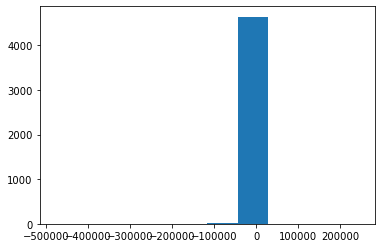

In [301]:
plt.hist(central_with_fmis_onhand['ohv_diff'])

In [302]:
np.sum(central_with_fmis_onhand['ohv_diff'])

-10225983.5493

In [303]:
central_with_fmis_onhand.sort_values(by='ohv_diff')[0:20]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price,fmis_ohv,calculated_ohv,ohv_diff
2552,03296811,107.625000,89.221547,2.246403,0.452732,442.0,457.0,CS004,104.0,71164.0800,100.0,100.0,200.0,-342.0,-357.0,0.966318,684.2700,1.368540e+05,6.151587e+05,-478304.7300
796,02507430,16.250000,7.072541,3.054731,2.933816,71.0,82.0,CS004,45.0,378496.5480,40.0,80.0,80.0,-31.0,-2.0,2.769231,8411.0344,1.009324e+06,1.286888e+06,-277564.1352
5012,43008049,17.416667,6.933714,2.641781,0.803179,64.0,81.0,CS004,28.0,72188.8664,30.0,30.0,60.0,-34.0,-51.0,1.607656,2578.1738,1.546904e+05,3.738352e+05,-219144.7730
3115,04294272,70.545455,130.776954,0.469575,0.530942,95.0,174.0,CS004,72.0,47194.7904,10.0,10.0,20.0,-85.0,-164.0,1.020619,655.4832,1.310966e+04,1.763250e+05,-163215.3168
1510,02633003,2.666667,1.699673,1.041096,0.284932,5.0,8.0,CS004,1.0,9754.4300,0.0,0.0,2.0,-5.0,-8.0,0.375000,9754.4300,0.000000e+00,1.268076e+05,-126807.5900
3641,04532020,26.166667,23.540155,0.173516,0.055670,9.0,57.0,CS004,12.0,41280.0000,10.0,20.0,30.0,1.0,-37.0,0.458599,3440.0000,1.032000e+05,2.270400e+05,-123840.0000
1127,02580239,33.166667,19.692779,2.266622,0.770719,120.0,142.0,CS004,146.0,66148.2200,0.0,0.0,0.0,-120.0,-142.0,4.402010,453.0700,0.000000e+00,1.187043e+05,-118704.3400
2969,04282087,4.000000,2.323790,1.196712,1.350139,8.0,13.0,CS004,34.0,250260.8692,2.0,3.0,4.0,-6.0,-10.0,8.500000,7360.6138,3.680307e+04,1.545729e+05,-117769.8208
2555,03296917,14.800000,5.912698,2.470356,0.549814,51.0,66.0,CS004,33.0,67894.8600,30.0,30.0,60.0,-21.0,-36.0,2.229730,2057.4200,1.234452e+05,2.407181e+05,-117272.9400
1075,02574045,2.857143,2.099563,2.058219,1.367281,10.0,12.0,CS004,2.0,11974.0000,2.0,2.0,4.0,-8.0,-10.0,0.700000,5987.0000,2.394800e+04,1.317140e+05,-107766.0000


In [304]:
np.sum(central_with_fmis_onhand['calculated_ohv'])

27179682.6399

In [306]:
np.sum(central_with_fmis_onhand['fmis_ohv'])

16956466.5781

In [307]:
np.sum(central_with_fmis_onhand['On Hand Value']) - np.sum(central_with_fmis_onhand['calculated_ohv'])

-10797698.8576

We wouldn't really reduce OHV that much. In fact, we would increase it by 10 million dollars. If that's what we optimize for, we could probably save more. 

In [312]:
central_with_fmis_onhand.loc[central_with_fmis_onhand['roq_diff'] <= 0]['ohv_diff'].sum()

-11393323.215200001

In [314]:
central_with_fmis_onhand.loc[central_with_fmis_onhand['roq_diff'] <= 0]

,TXN - Item ID,usage_mean,usage_std,leadtime_mean,leadtime_std,part_minimum,part_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_diff,roq_diff,quarters_on_hand,Unit Price,fmis_ohv,calculated_ohv,ohv_diff
0,00176001,15.750000,14.024532,0.081096,0.184266,2.0,33.0,CS004,14.0,240.4402,10.0,10.0,20.0,8.0,-23.0,0.888889,17.1743,343.4860,601.1005,-257.6145
1,00207001,18.583333,14.935742,0.275106,0.382035,9.0,42.0,CS004,58.0,856.0800,12.0,17.0,29.0,3.0,-25.0,3.121076,14.7600,428.0400,752.7600,-324.7200
2,00250113,675.571429,741.021661,0.466536,0.442777,661.0,1666.0,CS004,500.0,56.4000,500.0,500.0,1000.0,-161.0,-1166.0,0.740114,0.1128,112.8000,262.4856,-149.6856
3,00250125,852.666667,614.123404,0.190286,0.124712,279.0,1868.0,CS004,1000.0,8388.0000,0.0,367.0,1000.0,-279.0,-1501.0,1.172791,8.3880,3078.3960,18009.0360,-14930.6400
4,00250126,1074.444444,494.219050,0.572747,0.632629,898.0,2764.0,CS004,2000.0,8500.0000,500.0,500.0,1500.0,-398.0,-2264.0,1.861427,4.2500,4250.0000,15563.5000,-11313.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,45050037,76.545455,179.571391,1.186606,0.453083,304.0,244.0,CS004,355.0,3141.7500,35.0,35.0,60.0,-269.0,-209.0,4.637767,8.8500,619.5000,4849.8000,-4230.3000
5050,45050114,21.000000,15.459625,1.065753,0.343363,39.0,64.0,CS004,50.0,6709.5000,4.0,4.0,12.0,-35.0,-60.0,2.380952,134.1900,1073.5200,13821.5700,-12748.0500
5051,45050129,5.166667,2.477678,1.063769,0.277538,8.0,16.0,CS004,12.0,2087.5512,12.0,12.0,36.0,4.0,-4.0,2.322581,173.9626,4175.1024,4175.1024,0.0000
5053,45050134,5.833333,4.336537,0.666438,0.180082,7.0,16.0,CS004,20.0,278.6480,12.0,10.0,22.0,5.0,-6.0,3.428571,13.9324,306.5128,320.4452,-13.9324


We are increasing the ROQ for most parts. Maybe ROQ should only be (quarters per purch * usage mean)? We don't have to "go back up" to the min – the quarters per purch should last. 

In [321]:
historical_lead_time = pd.read_csv("Data/historical_lead_time.csv", index_col=0, converters=txn_converter)

In [322]:
historical_lead_time

,Lead Time,TXN - Item ID,PO Date
0,176,02591562,2021-07-08
1,1,30610041,2021-12-30
2,45,03207118,2021-11-15
3,56,03590002,2021-11-04
4,118,05295170,2021-09-03
...,...,...,...
236848,24,04590441,2004-03-10
236849,24,04590442,2004-03-10
236850,15,02661079,2004-03-19
236851,37,03296432,2004-02-26


In [323]:
historical_lead_time['PO Date'] = pd.to_datetime(historical_lead_time['PO Date'])

In [332]:
recent_five_times = historical_lead_time.sort_values(by='PO Date', ascending=False).groupby('TXN - Item ID').head(5)

In [336]:
recent_lead_times_df = recent_five_times.groupby('TXN - Item ID')['Lead Time'].mean().rename('leadtime_mean').to_frame().reset_index()

In [339]:
recent_five_times.groupby('TXN - Item ID')['Lead Time'].mean().rename('leadtime_mean').to_frame()

,leadtime_mean
TXN - Item ID,
00170002,13.000000
00170004,9.500000
00170005,10.666667
00170009,67.000000
00170010,21.000000
...,...
R2694037,47.600000
R2694038,92.800000
R2695001,92.200000
